In [1]:
# BATTING AVERAGE - MOOKIE BETTS 

from pybaseball import batting_stats
import pandas as pd 

mookie_betts_stats = pd.DataFrame()

for year in range(2017, 2024):
    # skip 2020 season 
    if year == 2020: 
        continue 
        
    yearly_stats = batting_stats(year)
    
    mookie_yearly_stats = yearly_stats[yearly_stats['Name'] == 'Mookie Betts']
    
    mookie_betts_stats = pd.concat([mookie_betts_stats, mookie_yearly_stats])
    
    mookie_betts_stats.reset_index(drop=True, inplace=True)
    
# Display Mookie Betts' stats from 2017 to 2024
print(mookie_betts_stats)
    

    IDfg  Season          Name Team  Age    G   AB   PA    H   1B  ...  maxEV  \
0  13611    2017  Mookie Betts  BOS   24  153  628  712  166   94  ...  111.7   
1  13611    2018  Mookie Betts  BOS   25  136  520  614  180   96  ...  110.6   
2  13611    2019  Mookie Betts  BOS   26  150  597  706  176  102  ...  109.3   
3  13611    2021  Mookie Betts  LAD   28  122  466  550  123   68  ...  107.9   
4  13611    2022  Mookie Betts  LAD   29  142  572  639  154   76  ...  109.0   
5  13611    2023  Mookie Betts  LAD   30  152  584  693  179   99  ...  110.1   

   HardHit  HardHit%  Events  CStr%   CSW%    xBA   xSLG  xwOBA  L-WAR  
0      209     0.377     554  0.236  0.287  0.273  0.436  0.340    5.3  
1      217     0.500     434  0.220  0.270  0.309  0.606  0.431   10.4  
2      239     0.473     505  0.206  0.257  0.311  0.577  0.411    6.4  
3      159     0.413     385  0.195  0.256  0.263  0.445  0.357    3.9  
4      211     0.447     472  0.173  0.239  0.254  0.465  0.344    

In [2]:
# most recent code

In [3]:
# batting AVG - mookie betts 

C:\Users\phily\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


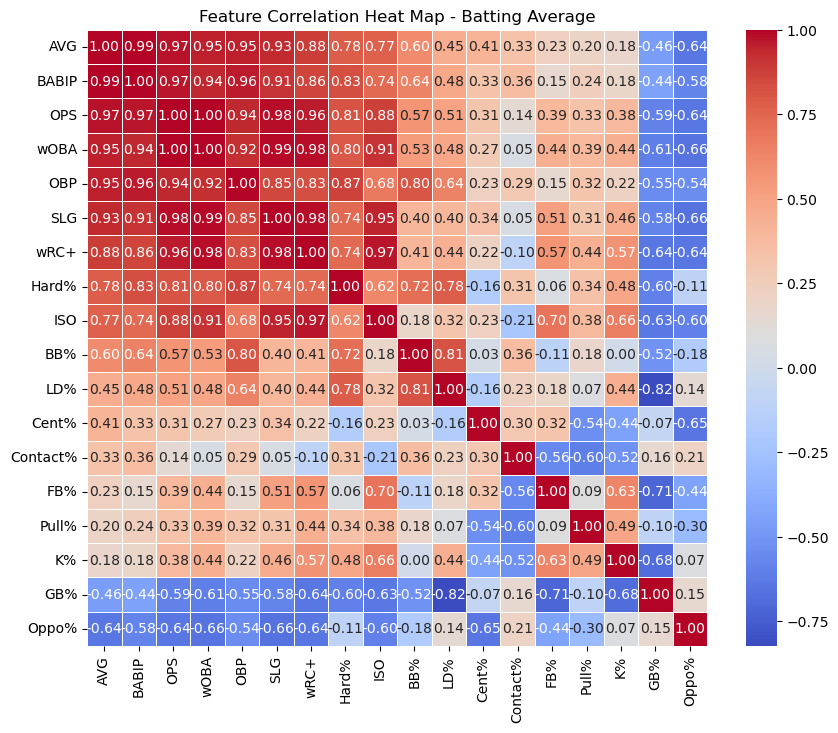

Mean Absolute Error: 0.01693033922800899
R-squared: 0.811711540409657
Predicted AVG for next season: 0.3069999999999371


In [4]:
from pybaseball import batting_stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetching Mookie Betts' stats
mookie_betts_stats = pd.DataFrame()
for year in range(2017, 2024):
    if year == 2020:  # Skip 2020 season
        continue
    yearly_stats = batting_stats(year)
    mookie_yearly_stats = yearly_stats[yearly_stats['Name'] == 'Mookie Betts']
    mookie_betts_stats = pd.concat([mookie_betts_stats, mookie_yearly_stats])

# Reset index for clean dataframe
mookie_betts_stats.reset_index(drop=True, inplace=True)

# Selected features
features = ['AVG', 'BABIP', 'OPS', 'wOBA', 'OBP', 'SLG', 'wRC+', 'Hard%', 'ISO',  'BB%', 'LD%', 'Cent%', 'Contact%', 'FB%', 'Pull%', 'K%', 'GB%', 'Oppo%']


# Dropping rows with missing values for selected features
mookie_data = mookie_betts_stats.dropna(subset=features)

# Preparing data for polynomial regression
X = mookie_data[features[1:]]  # Exclude 'AVG' from features
y = mookie_data['AVG']

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Predicting next season's AVG based on the most recent stats
latest_stats = X.iloc[-1].values.reshape(1, -1)  # Get the last available row
latest_stats_poly = poly.transform(latest_stats)  # Transform with PolynomialFeatures
next_season_prediction = model.predict(latest_stats_poly)[0]

# Metrics
# mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# correlation heat map 
correlation_matrix = mookie_data[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heat Map - Batting Average')
plt.show()

# Displaying results
print(f"Mean Absolute Error: {mae}")
# print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print(f"Predicted AVG for next season: {next_season_prediction}")



In [5]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Polynomial regression model
kf = KFold(n_splits=2, shuffle=True, random_state=42)  # 5-fold cross-validation

# Using cross-validation for R-squared
cv_r2_scores = cross_val_score(model, X_poly, y, cv=kf, scoring='r2')
cv_mae_scores = cross_val_score(model, X_poly, y, cv=kf, scoring='neg_mean_absolute_error')  # Negated for consistency

# Display results
print(f"Cross-validated R-squared scores: {cv_r2_scores}")
print(f"Average R-squared: {np.mean(cv_r2_scores)}")
print(f"Cross-validated MAE scores: {-cv_mae_scores}")  # Convert back to positive
print(f"Average MAE: {np.mean(-cv_mae_scores)}")


Cross-validated R-squared scores: [ 0.7392174  -0.48967505]
Average R-squared: 0.12477117739452281
Cross-validated MAE scores: [0.01519577 0.01642226]
Average MAE: 0.01580901406316863


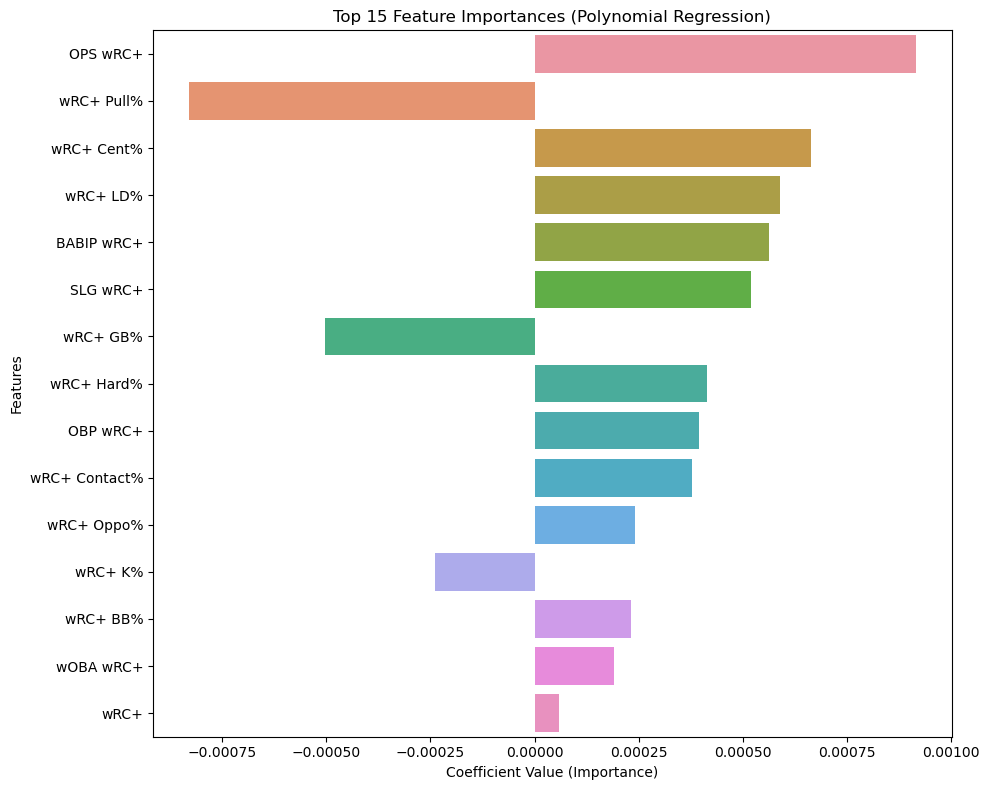

In [6]:
# Extract feature importance from coefficients
feature_names = poly.get_feature_names_out(X.columns)
coefficients = model.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
}).sort_values(by='Importance', key=abs, ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))  # Show top 15 features
plt.title("Top 15 Feature Importances (Polynomial Regression)")
plt.xlabel("Coefficient Value (Importance)")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [7]:
# new code - jack flaherty

Data Preview:
 <bound method NDFrame.head of    Season  Age Team  Lg  WAR   W  L   W-L%   ERA   G  ...   SO9  SO/BB   LD%  \
0    2017   21  STL  NL -0.3   0  2  0.000  6.33   6  ...   8.4   2.00  25.4   
1    2018   22  STL  NL  3.2   8  9  0.471  3.34  28  ...  10.8   3.08  23.7   
2    2019   23  STL  NL  5.8  11  8  0.579  2.75  33  ...  10.6   4.20  24.6   
3    2021   25  STL  NL  0.8   9  2  0.818  3.22  17  ...   9.8   3.27  25.9   
4    2022   26  STL  NL -0.1   2  1  0.667  4.25   9  ...   8.3   1.50  27.1   
5    2023   27  STL  NL  1.4   7  6  0.538  4.43  20  ...   8.7   1.96  25.6   
6    2023   27  BAL  AL -0.6   1  3  0.250  6.75   9  ...  10.9   3.50  34.6   

    GB%   FB%     BA    OBP    SLG    OPS  BAbip  
0  49.2  25.4  0.284  0.362  0.481  0.843  0.322  
1  42.1  23.4  0.199  0.290  0.345  0.635  0.258  
2  39.5  23.0  0.192  0.256  0.335  0.591  0.244  
3  39.0  29.3  0.199  0.278  0.364  0.642  0.236  
4  41.1  23.4  0.259  0.380  0.424  0.804  0.314  
5  45.3 

C:\Users\phily\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


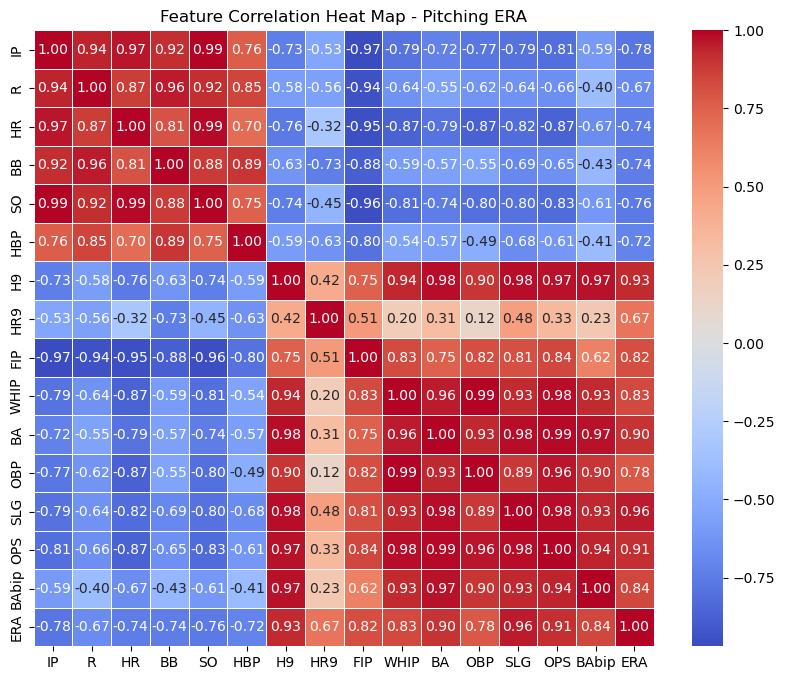

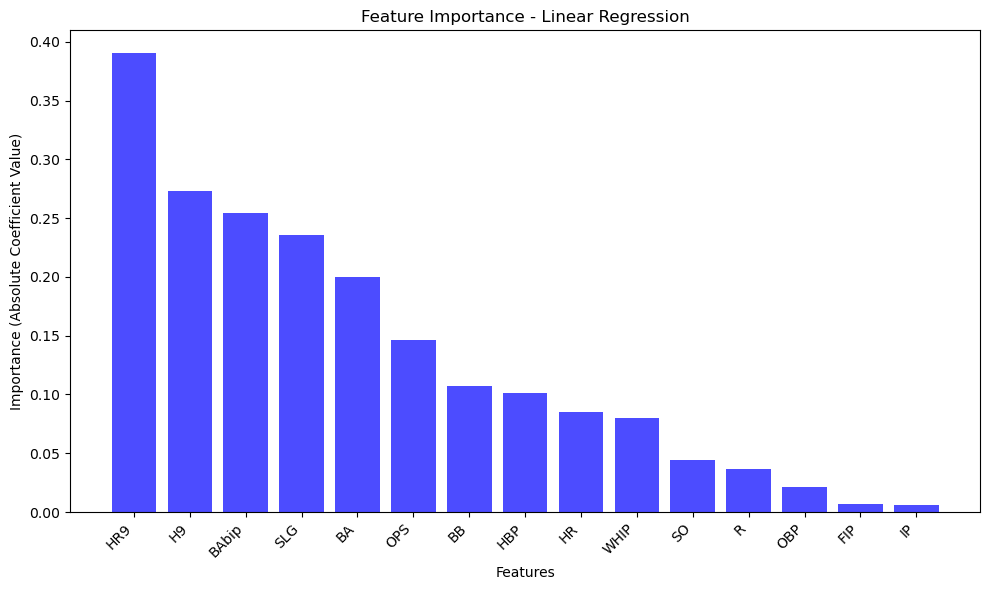

Mean Absolute Error (MAE): 0.5404058354193233
R-squared Value: 0.8667224151310627
Predicted ERA for the next season: 6.749999999999999


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('jack_flaherty.csv')  # Replace with your data file
print("Data Preview:\n", data.head)

# Define features and target variable
features = ['IP', 'H', 'R', 'HR', 'BB', 'SO', 'HBP', 'H9', 'HR9', 'BB9', 'SO9', 'FIP', 'WHIP', 'BA', 'OBP', 'SLG', 'OPS', 'BAbip']
target = 'ERA'

# Drop rows with missing values
data = data.dropna(subset=features + [target])

# Standardize features for better performance in regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

# Perform feature selection to identify the most predictive features
k_best = SelectKBest(score_func=f_regression, k=15)
X_selected = k_best.fit_transform(X_scaled, data[target])
selected_features = np.array(features)[k_best.get_support()]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, data[target], test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get the most recent stats (last row of the dataset)
latest_stats = data[features].iloc[-1].values.reshape(1, -1)

# Standardize the latest stats using the same scaler as the training data
latest_stats_scaled = scaler.transform(latest_stats)

# Select the most predictive features
latest_stats_selected = k_best.transform(latest_stats_scaled)

# Predict the ERA for the next season
next_season_era = model.predict(latest_stats_selected)[0]

# Create a correlation matrix
corr_matrix = data[selected_features.tolist() + [target]].corr()

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heat Map - Pitching ERA')
plt.show()

# Feature importance from regression coefficients
coefficients = model.coef_
importance = np.abs(coefficients)  # Take absolute values for importance
sorted_indices = np.argsort(importance)[::-1]  # Sort by importance in descending order
sorted_features = selected_features[sorted_indices]
sorted_importance = importance[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importance, color="blue", alpha=0.7)
plt.title("Feature Importance - Linear Regression")
plt.xlabel("Features")
plt.ylabel("Importance (Absolute Coefficient Value)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


print("Mean Absolute Error (MAE):", mae)
# print("Mean Squared Error (MSE):", mse)
print("R-squared Value:", r2)
print(f"Predicted ERA for the next season: {next_season_era}")



In [17]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=2, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE Scores:", -cv_scores)
print("Mean Cross-Validation MAE:", -np.mean(cv_scores))

cv_scores = cross_val_score(model, X_train, y_train, cv=2, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean CV R-squared:", np.mean(cv_scores))


Cross-Validation MAE Scores: [0.74938542 1.11036197]
Mean Cross-Validation MAE: 0.9298736945618042
Cross-Validation R-squared Scores: [-0.09412763  0.29568784]
Mean CV R-squared: 0.10078010748932104
